<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/wernervermeulen.github.io/blob/master/Deep_Learning_Exercises_World_class_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutions 
Convolutions are the basic building block for deep learning models in computer vision (and many other applications).
###Note:
I don't directly choose the numbers to go into my/our convolutions for deep learning... instead the deep learning technique determines what convolutions will be useful from the data (as part of model-training).

# Exercises
We'll use some small utilty functions to visualize raw images and some results of the code. By executing the next cell we load the utility functions.

In [0]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_1 import *
print("Setup Complete")

Run the cell to see a raw image as well as the output from applying this convolution to the image.
# Horizontal Line Convolutions

In [0]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
# load_my_image and visualize_conv are utility functions provided for this exercise
original_image = load_my_image() 
visualize_conv(original_image, horizontal_line_conv)

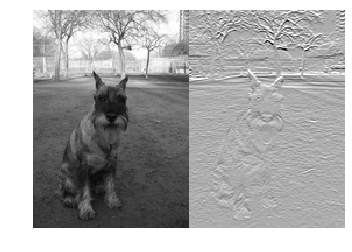

# Vertical Line Convolution: 
###Note: 
Both numbers on the left & right of the convolution should be the same, to avoid picking up other patterns.

In [0]:
vertical_line_conv = [[1, -1], 
                        [1, -1]]

visualize_conv(original_image, vertical_line_conv)

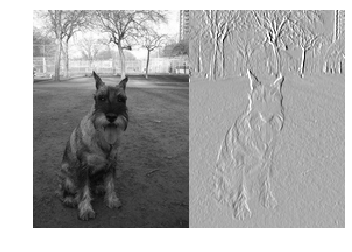

###Note:
While any one convolution measures only a single pattern, there are more possible convolutions that can be created with large sizes. So there are also more patterns that can be captured with large convolutions.

For example, it's possible to create a 3x3 convolution that filters for bright pixels with a dark one in the middle. There is no configuration of a 2x2 convolution that would capture this.

On the other hand, anything that can be captured by a 2x2 convolution could also be captured by a 3x3 convolution.

Does this mean powerful models require extremely large convolutions? Not necessarily. Later on, we will see how deep learning models put together many convolutions to capture complex patterns... including patterns to complex to be captured by any single convolution.

#Exercise 2:
By the end of this exercise, we will understand how convolutions are combined to enable superhuman achievements in computer vision.
I will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

Starting of with a See Food App. 
The TV show *Silicon Valley* had an app called "See Food" that promised to identify food. 

In this exercise, I write code using and comparing pre-trained models to choose one as an engine for the See Food app.

We run a few steps of environmental set-up before writing own code. **You don't need to understand the details of this set-up code.** You can just run each code cell until you get to the exercises.

#Set up: 
### 1) Create Image Paths
This workspace includes image files we will use to test our models. Run the cell below to store a few filepaths to these images in a variable `img_paths`.

In [0]:
import os
from os.path import join


hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

### 2) Run an Example Model
Here is the code used in the Kaggle, TensorFlow tutorial. It loads data, loads a pre-trained model, and makes predictions. Run this cell too.

In [0]:
from IPython.display import Image, display
from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array


image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3)

### 3) Visualize Predictions

In [0]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

 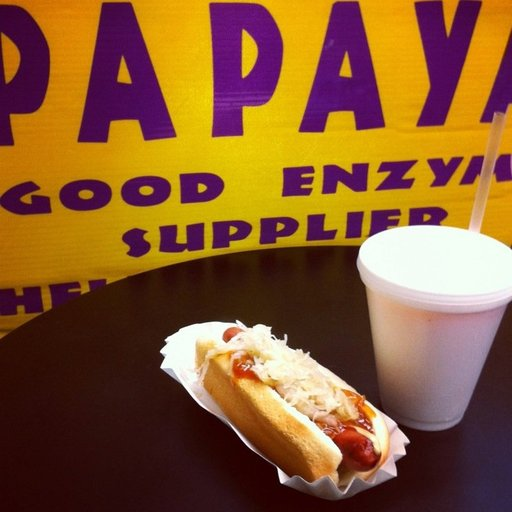

In [0]:
[('n07697537', 'hotdog', 0.87705314), ('n01981276', 'king_crab', 0.061292406), ('n07697313', 'cheeseburger', 0.0069073816)]

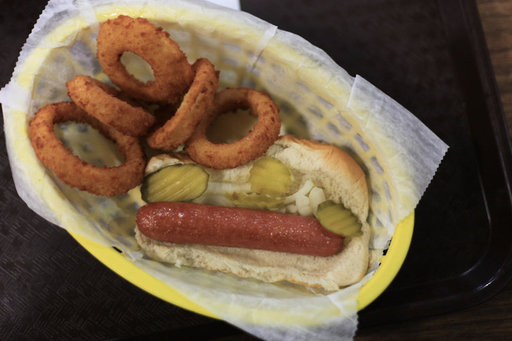

[('n07697537', 'hotdog', 0.9659182), ('n07697313', 'cheeseburger', 0.02986227), ('n07880968', 'burrito', 0.0007834714)]


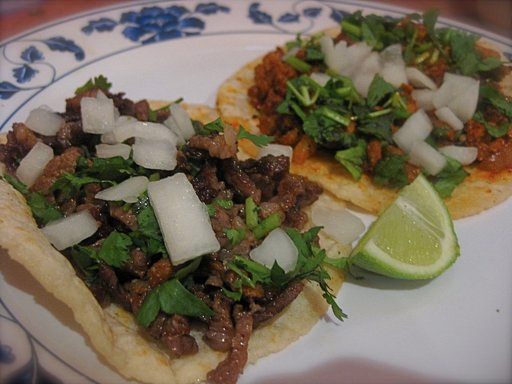

[('n07579787', 'plate', 0.797237), ('n07880968', 'burrito', 0.07533442), ('n07697537', 'hotdog', 0.05140326)]

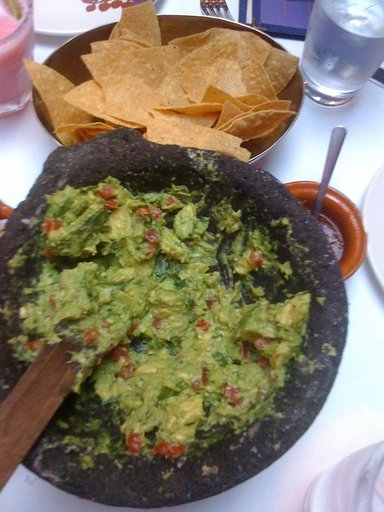

[('n07583066', 'guacamole', 0.9996675), ('n03786901', 'mortar', 7.326316e-05), ('n07579787', 'plate', 4.6946185e-05)]


# Exercises: See Food App

I write a couple useful functions in the next exercises. Then I will put these functions together to compare the effectiveness of various pretrained models for our hot-dog detection program.

### Exercise 1

We want to distinguish whether an image is a hot dog or not. But our models classify pictures into 1000 different categories. Write a function that takes the models predictions (in the same format as `preds` from the set-up code) and returns a list of `True` and `False` values.